<a href="https://colab.research.google.com/github/nourhammmad/Leaf-Classification-DL/blob/main/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import zipfile
from PIL import Image
import os
import random
import nbconvert

#Load Data

In [180]:
# !pip install kaggle


In [181]:
# ! mkdir ~/.kaggle


In [182]:
# from google.colab import files
# uploaded = files.upload()


In [183]:
# ! cp kaggle.json ~/.kaggle/

In [184]:
# !kaggle competitions download -c leaf-classification


In [185]:
# !unzip /content/leaf-classification.zip -d /content


In [186]:
# import os
# os.listdir('/content')


In [187]:
# !unzip /content/images.zip -d /content/images


In [188]:
# !unzip /content/train.csv.zip -d /content


In [189]:
# import shutil
# import os

# # Define source and destination paths
# source_dir = '/content/images/images'
# destination_dir = '/content/images'

# # Move all files and subdirectories from source_dir to destination_dir
# for item in os.listdir(source_dir):
#     source_item = os.path.join(source_dir, item)
#     destination_item = os.path.join(destination_dir, item)
#     shutil.move(source_item, destination_item)

# # Remove the now-empty source directory
# os.rmdir(source_dir)

# print(f"Moved all contents from {source_dir} to {destination_dir}")

# **Loading the Dataset**

In [190]:
train = pd.read_csv('/content/train.csv')

#sample_submission = pd.read_csv('/content/sample_submission.csv')

In [191]:
import os
os.listdir('/content/images')


['64.jpg',
 '898.jpg',
 '82.jpg',
 '241.jpg',
 '1579.jpg',
 '558.jpg',
 '881.jpg',
 '597.jpg',
 '804.jpg',
 '1145.jpg',
 '1574.jpg',
 '98.jpg',
 '1313.jpg',
 '860.jpg',
 '818.jpg',
 '148.jpg',
 '1139.jpg',
 '339.jpg',
 '1421.jpg',
 '200.jpg',
 '682.jpg',
 '418.jpg',
 '1484.jpg',
 '67.jpg',
 '1446.jpg',
 '1442.jpg',
 '1576.jpg',
 '1261.jpg',
 '1193.jpg',
 '117.jpg',
 '1142.jpg',
 '662.jpg',
 '1140.jpg',
 '236.jpg',
 '1572.jpg',
 '952.jpg',
 '300.jpg',
 '610.jpg',
 '837.jpg',
 '1489.jpg',
 '1341.jpg',
 '921.jpg',
 '561.jpg',
 '812.jpg',
 '758.jpg',
 '907.jpg',
 '1264.jpg',
 '1273.jpg',
 '1185.jpg',
 '1071.jpg',
 '146.jpg',
 '1344.jpg',
 '633.jpg',
 '479.jpg',
 '537.jpg',
 '829.jpg',
 '840.jpg',
 '1471.jpg',
 '604.jpg',
 '899.jpg',
 '343.jpg',
 '111.jpg',
 '358.jpg',
 '347.jpg',
 '277.jpg',
 '1496.jpg',
 '1487.jpg',
 '1119.jpg',
 '131.jpg',
 '1542.jpg',
 '1398.jpg',
 '858.jpg',
 '63.jpg',
 '733.jpg',
 '638.jpg',
 '893.jpg',
 '1584.jpg',
 '248.jpg',
 '1079.jpg',
 '960.jpg',
 '1113.jpg',
 '

# **Images Count**

In [192]:
from IPython.display import HTML

# Step 1: Specify the path to the images zip file
file_name = '/content/images.zip'

# Step 2: Open the zip file in READ mode
with zipfile.ZipFile(file_name, 'r') as zip:

    # Step 3: Retrieve all file names from the zip archive
    image_names = zip.namelist()

    # Step 4: Filter out image files with '.jpg' extensions using a list comprehension
    list_of_image_filenames = [filename for filename in image_names if filename.endswith('.jpg')]

    # Step 5: Display the output in HTML
    num_images = len(list_of_image_filenames)
    display(HTML(f"""
    <div>
        <p>The number of images in the zip file is: <strong>{num_images}</strong></p>
    </div>
    """))


# **Describe the data**

In [193]:
from IPython.display import HTML

# Example: Shape of the training dataset
train_shape = train.shape

# Display the output in HTML
display(HTML(f"""
<div>
    <h2> Training Dataset Shape</h2>
    <p>
        The dataset has <strong>{train_shape[0]}</strong> rows and <strong>{train_shape[1]}</strong> columns.
    </p>
</div>
"""))


# **Dataset Info**

In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


# **Features Datatypes**

# **Apply label encoding:**



**Mapping after enconding in <strong>List : mapping</strong>**  

# **Number of Classes**

In [195]:
# Count the number of species
num_classes = train['species'].unique().shape[0]
num_classes

99

# **Classes**

In [196]:
classes = train['species'].unique().tolist()
classes

['Acer_Opalus',
 'Pterocarya_Stenoptera',
 'Quercus_Hartwissiana',
 'Tilia_Tomentosa',
 'Quercus_Variabilis',
 'Magnolia_Salicifolia',
 'Quercus_Canariensis',
 'Quercus_Rubra',
 'Quercus_Brantii',
 'Salix_Fragilis',
 'Zelkova_Serrata',
 'Betula_Austrosinensis',
 'Quercus_Pontica',
 'Quercus_Afares',
 'Quercus_Coccifera',
 'Fagus_Sylvatica',
 'Phildelphus',
 'Acer_Palmatum',
 'Quercus_Pubescens',
 'Populus_Adenopoda',
 'Quercus_Trojana',
 'Alnus_Sieboldiana',
 'Quercus_Ilex',
 'Arundinaria_Simonii',
 'Acer_Platanoids',
 'Quercus_Phillyraeoides',
 'Cornus_Chinensis',
 'Liriodendron_Tulipifera',
 'Cytisus_Battandieri',
 'Rhododendron_x_Russellianum',
 'Alnus_Rubra',
 'Eucalyptus_Glaucescens',
 'Cercis_Siliquastrum',
 'Cotinus_Coggygria',
 'Celtis_Koraiensis',
 'Quercus_Crassifolia',
 'Quercus_Kewensis',
 'Cornus_Controversa',
 'Quercus_Pyrenaica',
 'Callicarpa_Bodinieri',
 'Quercus_Alnifolia',
 'Acer_Saccharinum',
 'Prunus_X_Shmittii',
 'Prunus_Avium',
 'Quercus_Greggii',
 'Quercus_Suber'

# **Each Class Frequency**

In [197]:
train['species'].value_counts()

,count
species,
Acer_Opalus,10
Crataegus_Monogyna,10
Acer_Mono,10
Magnolia_Heptapeta,10
Acer_Capillipes,10
...,...
Alnus_Rubra,10
Rhododendron_x_Russellianum,10
Cytisus_Battandieri,10


# **Clean the data**

In [198]:
train.isnull().sum()

,0
id,0
species,0
margin1,0
margin2,0
margin3,0
...,...
texture60,0
texture61,0
texture62,0
texture63,0


no nulls

# **Check Duplicates**

In [199]:
train.duplicated().sum()

0

no duplicates

In [200]:
import pandas as pd

# Assuming 'train' is your training dataset with numeric columns

# Step 1: Extract numeric columns except 'id'
# Drop the 'id' column if it's present, then select only the numeric columns
train_numeric = train.drop(columns=['id'], errors='ignore')  # Drop 'id' column if it exists
train_numeric = train_numeric.select_dtypes(include=[float, int])  # Keep only numeric columns (int and float)

# Step 2: Calculate the mean and standard deviation for each numeric column
train_mean = train_numeric.mean()  # Calculate mean for each feature (column)
train_std = train_numeric.std()    # Calculate standard deviation for each feature (column)

# Step 3: Print mean and standard deviation to check if standardization is needed
print("Mean of each feature:")
print(train_mean)

print("\nStandard Deviation of each feature:")
print(train_std)

# Step 4: Decide if standardization is needed (based on large mean or high variance)
def should_standardize(mean, std, threshold=0.5):
    standardization_needed = {}
    for col in mean.index:
        # If the standard deviation is large (greater than the threshold), or the mean is far from 0
        if std[col] > threshold or abs(mean[col]) > threshold:
            standardization_needed[col] = True
        else:
            standardization_needed[col] = False
    return standardization_needed

# Get decision on which columns need standardization
standardization_decision = should_standardize(train_mean, train_std)

# Print decision on which columns need standardization
print("\nStandardization Decision (True means standardization is needed):")
print(standardization_decision)

# Step 5: Standardize the data by subtracting the mean and dividing by the standard deviation
train_standardized = train_numeric.copy()  # Create a copy of the numeric columns

# Apply standardization only on columns that need it
for feature, need_standardization in standardization_decision.items():
    if need_standardization:
        train_standardized[feature] = (train_standardized[feature] - train_mean[feature]) / train_std[feature]

# Step 6: Display the standardized dataset
print("\nStandardized Data (where applicable):")
train_standardized.head()


Mean of each feature:
margin1      0.017412
margin2      0.028539
margin3      0.031988
margin4      0.023280
margin5      0.014264
               ...   
texture60    0.014017
texture61    0.002688
texture62    0.020291
texture63    0.008989
texture64    0.019420
Length: 192, dtype: float64

Standard Deviation of each feature:
margin1      0.019739
margin2      0.038855
margin3      0.025847
margin4      0.028411
margin5      0.018390
               ...   
texture60    0.060151
texture61    0.011415
texture62    0.039040
texture63    0.013791
texture64    0.022768
Length: 192, dtype: float64

Standardization Decision (True means standardization is needed):
{'margin1': False, 'margin2': False, 'margin3': False, 'margin4': False, 'margin5': False, 'margin6': False, 'margin7': False, 'margin8': False, 'margin9': False, 'margin10': False, 'margin11': False, 'margin12': False, 'margin13': False, 'margin14': False, 'margin15': False, 'margin16': False, 'margin17': False, 'margin18': False, '

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [201]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # Save a copy of the original dataset before modification
# train_original = train.copy()

# # Drop the 'id' column temporarily and separate categorical columns
# categorical_columns = train.select_dtypes(include=['object']).columns
# train_numeric = train.drop(columns=categorical_columns)  # Keep only numeric columns
# train_numeric = train_numeric.drop(columns=['id'])  # Drop the 'id' column temporarily

# # Normalize the numeric columns using MinMaxScaler
# scaler = MinMaxScaler()
# train_numeric[:] = scaler.fit_transform(train_numeric)  # Normalize in place

# # Reattach the categorical columns back to the normalized numeric columns
# train_numeric[categorical_columns] = train[categorical_columns]  # Reattach categorical columns

# # Reattach the 'id' column back to the dataset after normalization
# train_numeric['id'] = train['id']  # Add back the 'id' column

# # Move 'id' column first, then 'species', and the rest of the columns follow
# columns = ['id'] + ['species'] + [col for col in train_numeric.columns if col not in ['id', 'species']]

# # Reorder the dataset to have 'id' and 'species' at the beginning
# train = train_numeric[columns]

# # Now, train contains the normalized data with categorical columns and 'id' and 'species' as the first two columns
# print("Normalized Data (Min-Max scaling to [0, 1]):")
# train.head()


# **Visualization**

<ipython-input-202-ee258a08f40b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = species_count.index, y = species_count.values, palette="Blues_d")


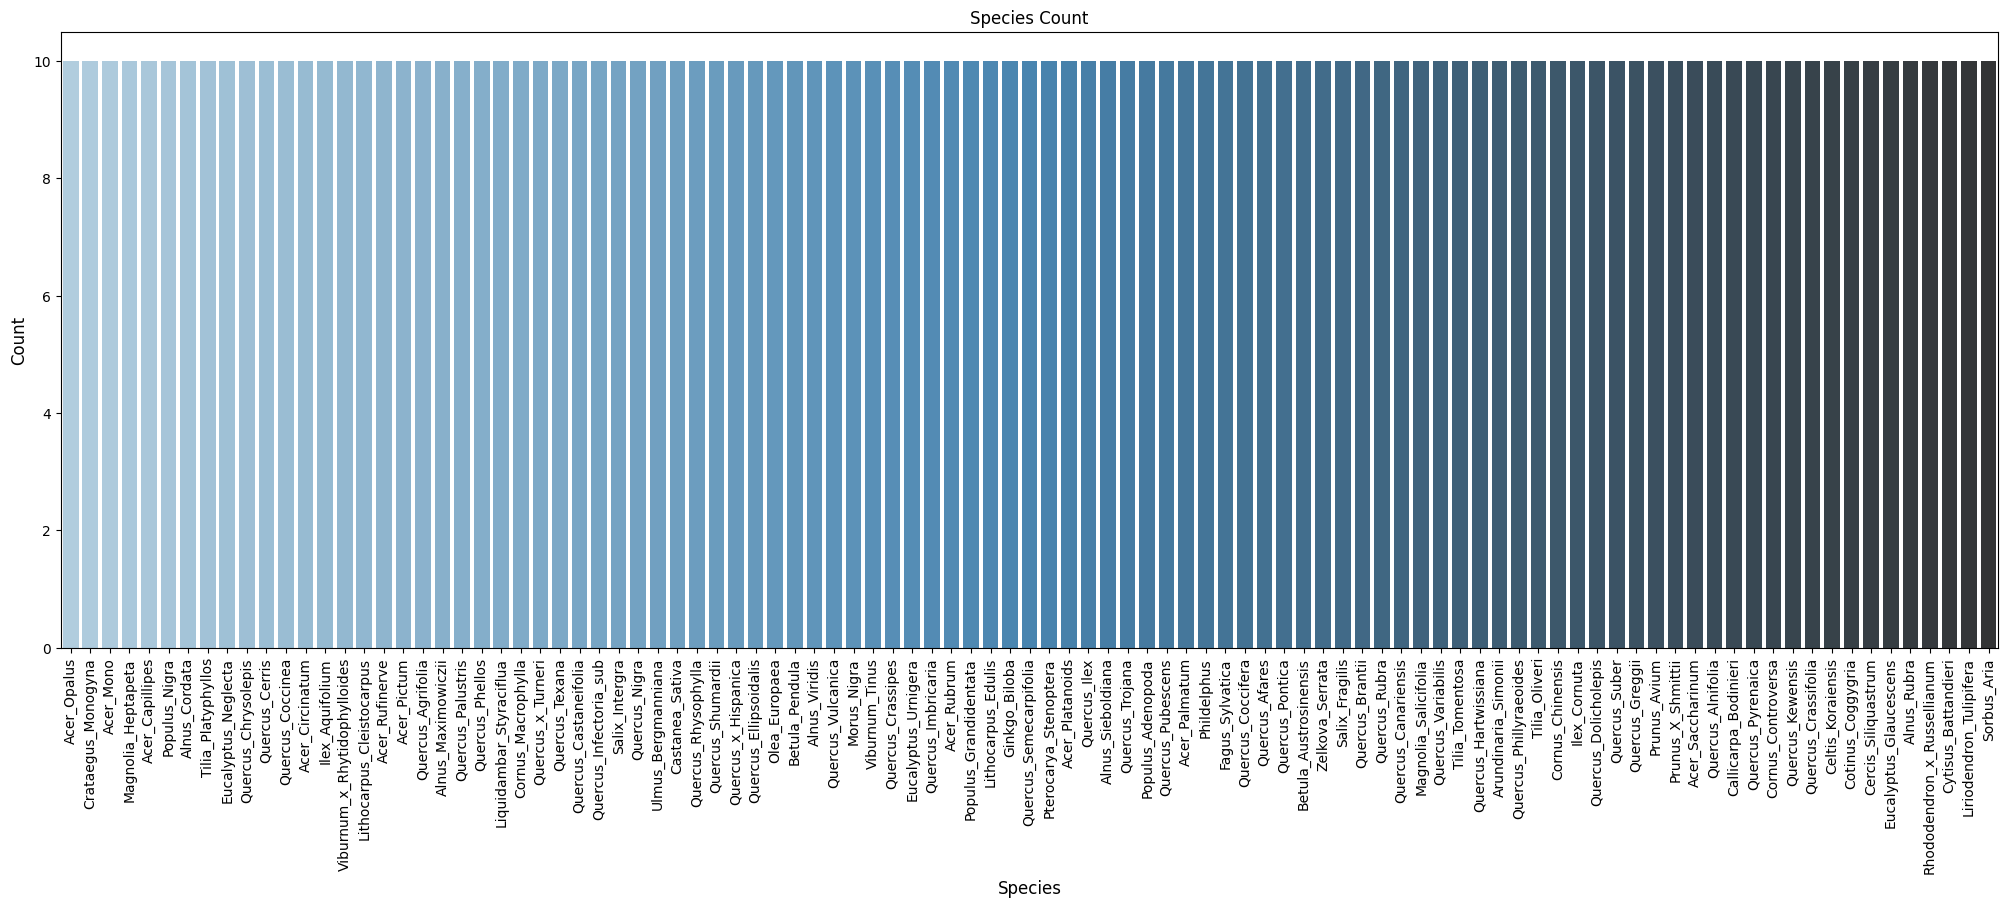

In [202]:
# Count the number of datapoints for every species
species_count = train['species'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(x = species_count.index, y = species_count.values, palette="Blues_d")
plt.title('Species Count')
plt.xticks(rotation='vertical')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.show()

<ipython-input-203-ebbe5ebe7294>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


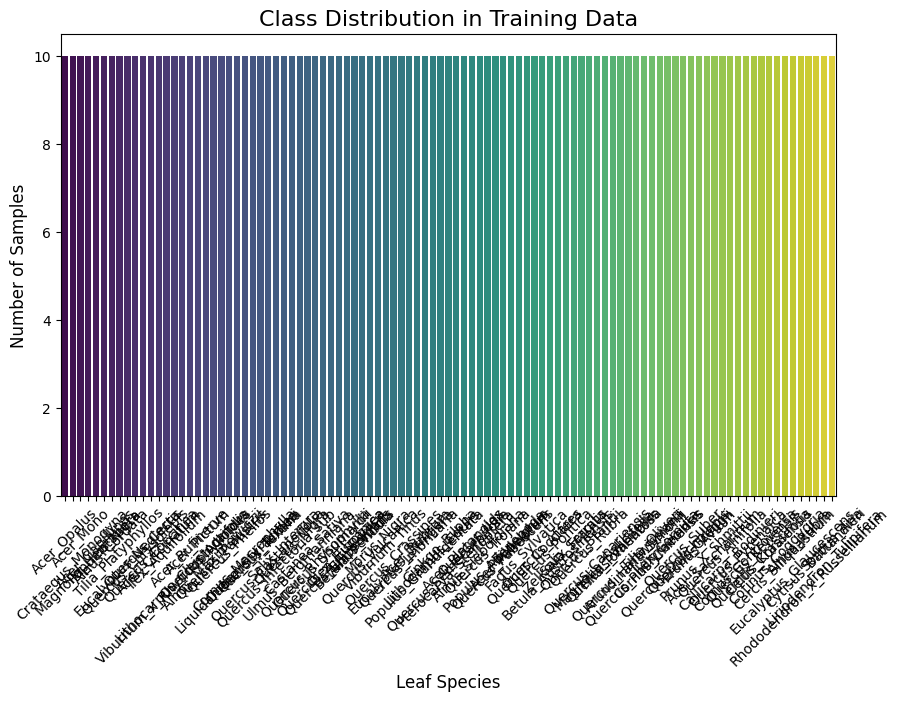

In [203]:
class_counts = train['species'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Leaf Species", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


# **Draw some of the images**

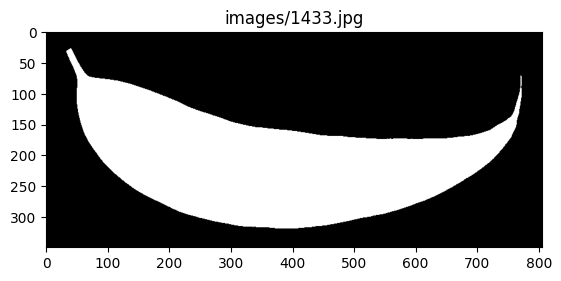

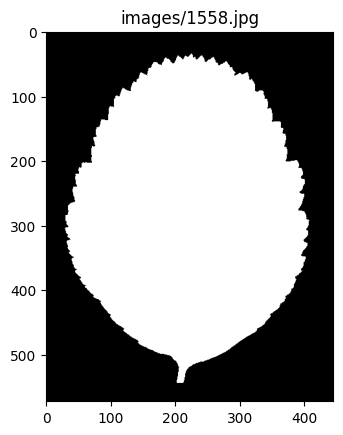

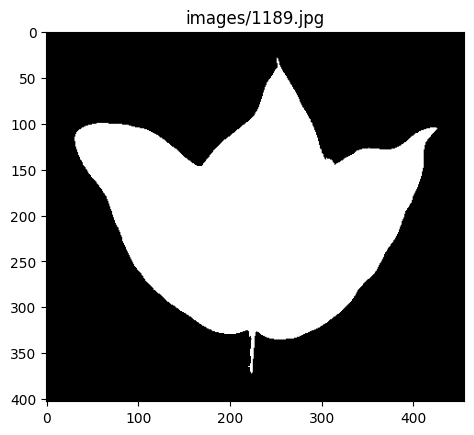

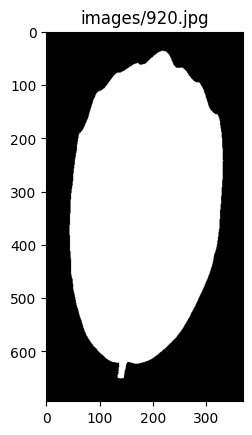

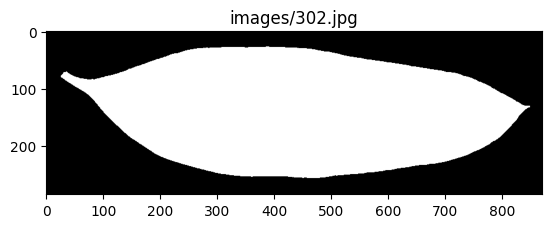

In [204]:
# Match the image filenames in the zip file with the ids in the train_df DataFrame
matched_images = [img for img in image_names if any(str(id) in img for id in train['id'])]

# Randomly pick 5 images
random.seed(4)
five_images = random.sample(matched_images, 5)

# Display the images
for img_name in five_images:
    with zipfile.ZipFile('/content/images.zip', 'r') as myzip:
        with myzip.open(img_name) as myfile:
            img = Image.open(myfile)
            plt.imshow(img, cmap='gray')
            plt.title(img_name)
            plt.show()

# **correlation analysis**

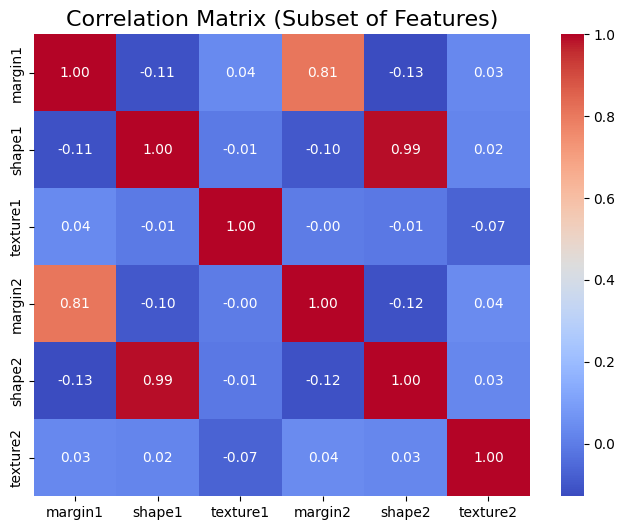

In [205]:
# Select a subset of columns for analysis
subset_features = ['margin1', 'shape1', 'texture1', 'margin2', 'shape2', 'texture2']
correlation_matrix = train[subset_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Subset of Features)", fontsize=16)
plt.show()


In [206]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Add the 'image_path' column to train DataFrame
train['image_path'] = train['id'].apply(lambda x: os.path.join('/content/images', f'{x}.jpg'))  # Adjust extension if needed

# Define a preprocessing function
def preprocess_images(df, target_column=None, target_size=(128, 128)):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = row['image_path']
        img = load_img(img_path, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img_array)

        # Append the label if the target column is provided
        if target_column:
            labels.append(row[target_column])
    images = np.array(images)
    labels = np.array(labels) if target_column else None
    return images, labels

# Process the training data
X, y = preprocess_images(train, target_column='species')
# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Label encode the 'species' column

# Print encoded labels
print("Encoded labels:", y_encoded[:10])  # Print first 10 encoded labels

# Inverse transform to check species names
decoded_labels = label_encoder.inverse_transform(y_encoded)
print("Decoded labels:", decoded_labels[:10])  # Print first 10 decoded labels

# One-hot encode the labels
y_encoded_one_hot = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_one_hot, test_size=0.2, random_state=42)

# Drop the 'image_path' column after preprocessing
train.drop(columns=['image_path'], inplace=True)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Encoded labels: [ 3 49 65 94 84 40 54 78 53 89]
Decoded labels: ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis']
X_train shape: (792, 128, 128, 3)
y_train shape: (792, 99)
X_test shape: (198, 128, 128, 3)
y_test shape: (198, 99)


# **Identify Categorical Columns**

In [207]:
categorical_columns = train.select_dtypes(include=['object']).columns


In [208]:
from sklearn import preprocessing

# Initialize the LabelEncoder
le = preprocessing.LabelEncoder()

# Loop through each categorical column and apply label encoding
for col in categorical_columns:
    # Fit the label encoder on the column data
    le.fit(train[col])

    # Print the class labels (original values)
    print(f"Classes for {col}: {list(le.classes_)}")

    # Define a function to transform values and handle unseen labels
    def safe_transform(value):
        if value in le.classes_:
            return le.transform([value])[0]
        else:
            return -1  # Or some other value to represent unseen labels

    # Apply the safe_transform function to the column
    train[col] = train[col].apply(safe_transform)

    # Print the encoded values
    print(f"Encoded values for {col}: {train[col].tolist()}")

    # Print the mapping of encoded values to original labels
    mapping = {label: class_name for label, class_name in enumerate(le.classes_)}
    print(f"Mapping for {col}: {mapping}")


Classes for species: ['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shm

In [209]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Your previous image preprocessing and encoding steps are assumed to be correct

# Define the model
model = Sequential([
    # First convolutional layer with Input layer instead of input_shape
    Input(shape=(128, 128, 3)),  # Defining the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output for fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(y_train.shape[1], activation='softmax')  # Output layer (number of classes)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)

# Training the model with validation split
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),  # Use the test set as the validation set
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping based on validation loss
)



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 851ms/step - accuracy: 0.0143 - loss: 5.0323 - val_accuracy: 0.0152 - val_loss: 4.5563
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 892ms/step - accuracy: 0.0551 - loss: 4.4140 - val_accuracy: 0.1263 - val_loss: 3.9563
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 946ms/step - accuracy: 0.2139 - loss: 3.4245 - val_accuracy: 0.2980 - val_loss: 3.0004
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 890ms/step - accuracy: 0.3806 - loss: 2.4500 - val_accuracy: 0.4091 - val_loss: 2.5329
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 860ms/step - accuracy: 0.5583 - loss: 1.8033 - val_accuracy: 0.4596 - val_loss: 2.2427
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 839ms/step - accuracy: 0.6251 - loss: 1.4049 - val_accuracy: 0.5253 - val_loss: 2.1168
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 887ms/step - accuracy: 0.7466 - loss: 0.9206 - val_accuracy: 0.5202 - val_loss: 2.1220
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 849ms/step - accuracy: 0.7969 - loss: 0.6982 - val_accu

In [212]:
# Evaluating on the test data
test_predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


ID: 288 | Predicted Species: Acer_Pictum | Confidence: 0.5863
ID: 398 | Predicted Species: Quercus_Suber | Confidence: 0.2386
ID: 813 | Predicted Species: Acer_Pictum | Confidence: 0.8802
ID: 1344 | Predicted Species: Acer_Saccharinum | Confidence: 0.9743
ID: 1359 | Predicted Species: Ilex_Aquifolium | Confidence: 0.4193


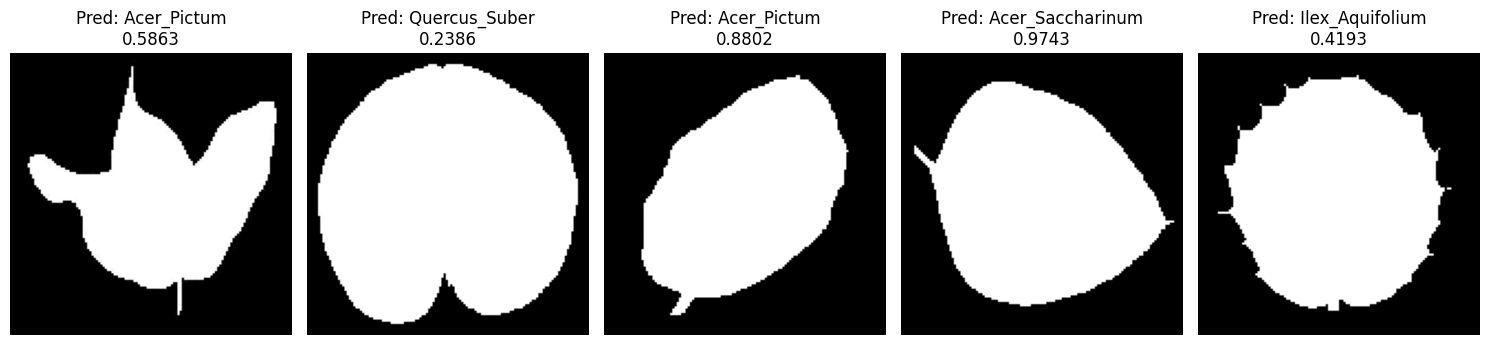

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img

# Convert predictions from one-hot encoding to class indices
predicted_classes = np.argmax(test_predictions, axis=1)

# Map class indices back to species names using the label encoder
predicted_species_names = label_encoder.inverse_transform(predicted_classes)  # Properly decode the species names

# Add predictions and probabilities to a DataFrame for X_test
test_results = pd.DataFrame({
    'id': test_ids,  # Using test_ids from your split
    'predicted_species': predicted_species_names,  # Use decoded species names
    'predicted_probabilities': np.max(test_predictions, axis=1)  # Add maximum probability for each prediction
})

# Display the first few results with images
fig, axes = plt.subplots(1, len(test_results.head()), figsize=(15, 5))  # Adjust size as needed

# Display images with predictions
for idx, (index, row) in enumerate(test_results.head().iterrows()):
    image_path = f'/content/images/{int(row["id"])}.jpg'  # Image file path
    predicted_species = row['predicted_species']  # Already decoded to species name
    predicted_probability = row['predicted_probabilities']

    # Print prediction info
    print(f"ID: {row['id']} | Predicted Species: {predicted_species} | Confidence: {predicted_probability:.4f}")

    # Load the image and display it
    img = load_img(image_path, target_size=(128, 128))  # Resize the image to ensure they are the same size
    ax = axes[idx]  # Get the axis for this image
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide axes for better presentation
    ax.set_title(f"Pred: {predicted_species}\n{predicted_probability:.4f}")  # Title with species and confidence

# Show the plot with images
plt.tight_layout()  # Ensure images are displayed next to each other without overlap
plt.show()